# Wavelength Dependent Scattering Example
In this notebook, we will examine using a wavelength distribution generator to generate a variety of wavelengths. Then we will use wavelength-dependent scattering to scatter these photons.

## Photon Distribution Generator
`phys.light`'s distribution generator works by taking a random sample for each $n$ photons desired and then using that random sample to generate a photon within the range of `min` and `max`. By default the function used to make the random distribution is `numpy.random.power(3)`. As can be seen below, we generate $50,000$ photons with wavelengths that vary from $200$ nm to $400$ nm.

In [1]:
import phys.light
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = phys.light.generate_photons(50000, min=phys.light.E_from_wavelength(200e-9), max=phys.light.E_from_wavelength(400e-9))
x.sort(key=lambda y: y.E)

Text(0.5, 1.0, '$\\log N_\\gamma$ vs. $\\log \\lambda$')

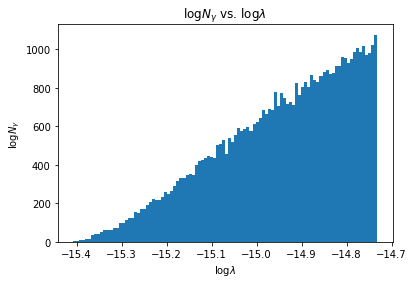

In [3]:
plt.hist([np.log(phys.light.wavelength_from_E(y.E)) for y in x], 100)
plt.xlabel("$\log \lambda$")
plt.ylabel("$\log N_\gamma$")
plt.title("$\log N_\gamma$ vs. $\log \lambda$")

## Wavelength Dependent Scattering
Next we will use a constant distribution of $100,000$ photons ranging from $600$ to $1200$ nm to observe how wavelength dependent scattering works. We will run our experiment using the following:

In [4]:
import phys
import phys.newton
sim = phys.Simulation({"cl_on": True, "exit": lambda cond: cond.t >= 0.100})
sim.add_objs(phys.light.generate_photons(100000, fn=np.random.random, min=phys.light.E_from_wavelength(600e-9), max=phys.light.E_from_wavelength(1200e-9)))
sim.add_step(0, phys.UpdateTimeStep(lambda x: 0.0005))
sim.add_step(1, phys.newton.NewtonianKinematicsStep())
sim.add_step(2, phys.light.ScatterSphericalStep(0.00000000000000001, 0.00000000000000005, wavelength_dep_scattering=True))
sim.add_step(3, phys.light.TracePathMeasureStep(None, id_info_fn = lambda x: str(x.E), trace_dv = True))

In [5]:
import time
sim.start()

while sim.running:
    time.sleep(10)
    print(sim.get_state())

{'objects': 100000, 't': 0.0015, 'dt': 0.0005, 'run_time': 10.023172855377197}
{'objects': 100000, 't': 0.0035, 'dt': 0.0005, 'run_time': 20.037200927734375}
{'objects': 100000, 't': 0.005000000000000001, 'dt': 0.0005, 'run_time': 30.12472176551819}
{'objects': 100000, 't': 0.006500000000000002, 'dt': 0.0005, 'run_time': 40.14157438278198}
{'objects': 100000, 't': 0.008500000000000004, 'dt': 0.0005, 'run_time': 50.18309569358826}
{'objects': 100000, 't': 0.010000000000000005, 'dt': 0.0005, 'run_time': 60.22428107261658}
{'objects': 100000, 't': 0.012000000000000007, 'dt': 0.0005, 'run_time': 70.2354884147644}
{'objects': 100000, 't': 0.013500000000000009, 'dt': 0.0005, 'run_time': 80.27167773246765}
{'objects': 100000, 't': 0.01500000000000001, 'dt': 0.0005, 'run_time': 90.2748920917511}
{'objects': 100000, 't': 0.01700000000000001, 'dt': 0.0005, 'run_time': 100.31607580184937}
{'objects': 100000, 't': 0.018500000000000013, 'dt': 0.0005, 'run_time': 110.37024998664856}
{'objects': 1000

Below are two histograms representing the scenario. The first one shows what distribution of photons we used. The next histogram represents the number of scatterings that occurred for each wavelength bin. As can be seen, the number of scatterings that occurs for a given wavelength increases dramatically, as the probability function for scattering, $P(coll) = \frac{A_0 \cdot n \cdot ||\Delta x||}{\lambda^4}$, would indicate.

Text(0, 0.5, 'Frequency')

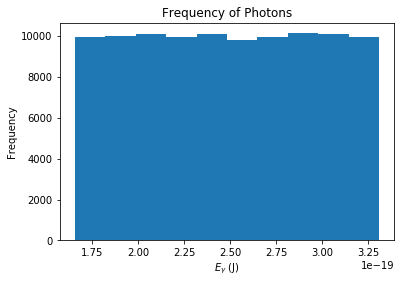

In [6]:
xy = []
for z in sim.steps[3].data[1:]:
    r = [phys.light.wavelength_from_E(np.double(z[0])) / 10 ** -9] * z[1]
    xy.extend(r)
x = [np.double(z[0]) for z in sim.steps[3].data[1:]]
y = [np.double(z[1]) for z in sim.steps[3].data[1:]]
plt.hist(x)
plt.title("Frequency of Photons")
plt.xlabel("$E_\gamma$ (J)")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Frequency of Scattering as a Result of $\\lambda$')

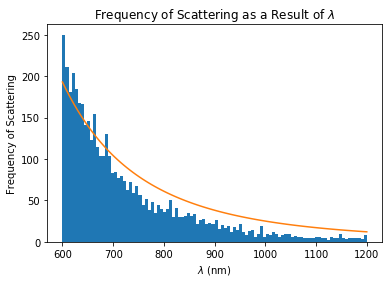

In [23]:
plt.hist(xy, 100)
plt.xlabel("$\lambda$ (nm)")
plt.ylabel("Frequency of Scattering")
plt.title("Frequency of Scattering as a Result of $\lambda$")